# 3W Toolkit

**Version:** 2.0.0  
**Authors:** Bruno Coelho Martins, Carla Pagliari, Eduardo A. B. Silva, Eduardo Henrique, Fernanda Duarte Vilela Reis de Oliveira, Gabriel Henrique Braga Lisboa, Luiza Helena de Andrade Leite, Marcello Campos, Matheus Ferreira Espirito Santo, Matheus Ramos Parracho, Natanael Moura Junior, Pedro Braga Lisboa, Rafael Padilla, Sergio Lima Netto, Thadeu Luiz Barbosa Dias, Umberto Augusto.  
**Description:** Demonstrative notebook with the main functions of *3W Toolkit*.


----

## Table of Contents 📑

1. 🚀 Introduction to 3WToolkit v2.0.0  
   1.1. Installing with `pip install`  
   1.2. Cloning & Installing  
   1.3. Forking & Installing  
   1.4. Using Anaconda Navigator  
   1.5. Using `conda`  
   1.6. Installing with `poetry`  

2. 📂 Dataset 3W   
   2.1. Downloading the Dataset    
   2.2. Filtering & Exploring the Data   
   2.3 Cleaning the dataset   

3. ⚙️ Preprocessing   
   3.1 Handling missing values (Imputation)  
   3.2 Normalization  
   3.3 Windowing  
   3.4 Renaming columns  

4. 🔎 Feature Extraction  
   4.1 Statistical Feature Extraction  
   4.2 Wavelet Feature Extraction  
   4.3 Exponentially Weighted Statistical Feature Extraction  

5. 📊 Exploratory Analysis  
   5.1. Visualizing Time Series  

6. 🤖 Model Training & Evaluation  

7. 📝 Generating Reports  

8. 🔄 Using the Automated Pipeline  
   8.1. Pipeline Structure  
   8.2. Configuring the Pipeline *(Explanation of BaseStep Config classes)*  
   8.3. Running & Evaluating Reports  


----

## 🚀 1. Introduction to 3WToolkit Version 2.0.0

The **3WToolkit version 2.0.0** is a **modular** and **open-source Artificial Intelligence (AI) toolkit** for **time series processing**, designed for **fault detection and classification** in the operation of **oil wells**.

Based on the experience with the original **3W Toolkit** system and using the [**3W dataset from Petrobras**](https://github.com/petrobras/3W/), the 3W Toolkit version 2.0.0 offers enhanced features such as:

- **Advanced data imputation**
- **Deep feature extraction**
- **Synthetic data augmentation**
- **High-performance computing capabilities** for model training

Please find bellow different ways to install the **3WToolkit** project hosted on GitHub: https://github.com/petrobras/3W.

------

### 1.1 Installation with `pip install`

```bash
pip install git+https://github.com/petrobras/3W.git
```

------

### 1.2. Cloning and installing


```bash
git clone https://github.com/petrobras/3W.git
cd 3WToolkit
pip install .
```

For editable/development install (`-e` installs it in editable/development mode, useful for contributing back to the original project via pull requests)

The 3W toolkit v.2.0.0 can be downloaded or cloned from the official repository [https://github.com/petrobras/3W](https://github.com/petrobras/3W) or can be installed via `pip install ThreeWtoolkit`

------

### 1.3. Forking and installing 


1. Fork the repository on GitHub https://github.com/petrobras/3W (button **Fork**).
2. Clone **your fork**:

```bash
git clone https://github.com/your-username/3W.git
cd 3WToolkit
pip install -e .
```


------


### 1.4 Using **Anaconda Navigator**

1. Open **Anaconda Navigator**.  
2. Go to **Environments → Create → New environment**.  
3. Open a terminal inside that environment.  
4. Install from GitHub with `pip`:

```bash
pip install git+https://github.com/petrobras/3W.git
```

------


### 1.5. Using `conda`


If there is an environment.yml file:

```bash
git clone https://github.com/petrobras/3W.git
cd 3WToolkit
conda env create -f environment.yml
conda activate 3WToolkit
```

If not, you can still use `pip` inside a conda environment:

```bash
conda create -n myenv python=3.10
conda activate myenv
pip install git+https://github.com/petrobras/3W.git
```

------

### 1.6 Installing with `poetry`

Add directly from GitHub: demands file `pyproject.toml` and Poetry:
```bash
poetry add git+https://github.com/petrobras/3W.git
```

For local development:
```bash
poetry add ./local/path/to/3W
```

Using clone:
```bash
git clone https://github.com/petrobras/3W.git
cd 3W
poetry install
```

### Imports

**Adaptation to recognize the project root. For demonstration purposes only.**

In [ ]:
import sys
import os

# Adds the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

**Required**

In [2]:
import numpy as np
import pandas as pd

# Importing ParquetDataset to download and load dataset
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset
from ThreeWToolkit.core.enums import EventPrefixEnum
# Apply mean imputation
from ThreeWToolkit.preprocessing import (
    impute_missing_data, 
    normalize, 
    windowing,
    rename_columns
)
from ThreeWToolkit.feature_extraction import (
    extract_wavelet_features,
    extract_statistical_features,
    extract_exponential_statistics_features
)
from ThreeWToolkit.data_visualization import (
    DataVisualization, 
    PlotMultipleSeries, 
    PlotCorrelationHeatmap
)

from pathlib import Path

-----

## 📂 2. Dataset 3W

* **Format**: Tabular, split into files in parquet format
* **Hosted** on: 3W Dataset 2.0.0 - Figshare
* **Size**: 1.67 GB
* **Splits**: 10 folders with parquet files, one folder for each event.
* **License** & Usage: Apache 2.0

### 2.1 Downloading the Dataset

Let’s download the dataset using the 3W library:

In [3]:
# define path
dataset_path = Path("../../data/raw/")

# create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False, download=True)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Found existing dataset at ..\..\data\raw\download.
[ParquetDataset] Dataset already extracted at ..\..\data\raw.


2228

### 2.2 Filtering & Exploring the Data

In [4]:
# Count events
total_events = len(ds)
total_events

2228

Each event is a dict containing: "signal" and "label"

In [5]:
event_id = 0
type(ds[event_id])

dict

In [6]:
ds[event_id].keys()

dict_keys(['signal', 'label', 'file_name'])

Lets check the "signal":

In [7]:
ds[event_id]["signal"]

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-PDG,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,state
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:07,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10074540.0,NaN,0.0,84.64463,NaN,0.0,119.0781,<NA>
2017-02-01 01:02:08,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10074540.0,NaN,0.0,84.63828,NaN,0.0,119.0781,<NA>
2017-02-01 01:02:09,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10074540.0,NaN,0.0,84.63194,NaN,0.0,119.0781,<NA>
2017-02-01 01:02:10,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10074540.0,NaN,0.0,84.62558,NaN,0.0,119.0781,<NA>
2017-02-01 01:02:11,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10074540.0,NaN,0.0,84.61923,NaN,0.0,119.0781,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01 06:59:56,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10014690.0,NaN,0.0,83.44021,NaN,0.0,119.0453,0
2017-02-01 06:59:57,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10014690.0,NaN,0.0,83.45413,NaN,0.0,119.0452,0
2017-02-01 06:59:58,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,NaN,10014690.0,NaN,0.0,83.46806,NaN,0.0,119.0451,0


Let's also check the unique values in "label" 

In [8]:
np.unique(ds[0]["label"])

array([ 0., nan])

In [9]:
ds[0]["label"]

,class
timestamp,
2017-02-01 01:02:07,<NA>
2017-02-01 01:02:08,<NA>
2017-02-01 01:02:09,<NA>
2017-02-01 01:02:10,<NA>
2017-02-01 01:02:11,<NA>
...,...
2017-02-01 06:59:56,0
2017-02-01 06:59:57,0
2017-02-01 06:59:58,0


Its also possible to filter/split the dataset using different methods:

#### Split by event type:

Lets, as an example select only DRAWN and SIMULATED event types:

In [10]:
event_types = [EventPrefixEnum.DRAWN, EventPrefixEnum.SIMULATED]
ds_config = ParquetDatasetConfig(path=dataset_path, event_type=event_types) # get drawn and simulated
ds = ParquetDataset(ds_config,)
len(ds) # should be much smaller

1109

And of REAL only:

In [11]:
event_types = [EventPrefixEnum.REAL,]
ds_config = ParquetDatasetConfig(path=dataset_path, event_type=event_types) # get only real
ds = ParquetDataset(ds_config,)
len(ds)

1119

Any combination of REAL, DRAWN and SIMULATED is also supported.

#### Split by event class

We may also filter by event classes. To select only events from class 0 we would do:

In [12]:
target_class = [0]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config,)
len(ds)

594

In [13]:
np.unique(ds[event_id]["label"])

array([0], dtype=int64)

And only for class 2:

In [14]:
target_class = [2]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config,)
len(ds)

38

In [15]:
np.unique(ds[event_id]["label"])

array([2], dtype=int64)

And we may select multiple classes:

In [16]:
target_class = [0, 2]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

632

We may combine type and class filters as well. For REAL class 2 events:

In [17]:
event_types = [EventPrefixEnum.REAL,]
target_class = [2,]
ds_config = ParquetDatasetConfig(path=dataset_path, event_type=event_types, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

22

### Split through file list

It is also possible to filter the desired events through a list of event names.

This is particularly useful to define train/test splits as the user may desire.

Given a list of event names (relative to the dataset root):

In [18]:
my_split = [
    "./0/WELL-00008_20170817140222.parquet",
    "./3/SIMULATED_00061.parquet",
    "./4/WELL-00004_20140806090103.parquet",
    "./6/SIMULATED_00117.parquet",
    "./0/WELL-00001_20170201110124.parquet",
    "./5/SIMULATED_00138.parquet",
    "./4/WELL-00005_20170624070158.parquet",
    "./8/SIMULATED_00044.parquet",
    "./5/SIMULATED_00303.parquet",
    "./9/SIMULATED_00028.parquet",
    "./8/SIMULATED_00072.parquet",
    "./7/WELL-00022_20180802233838.parquet",
    "./0/WELL-00003_20170812110000.parquet",
    "./9/SIMULATED_00115.parquet",
    "./1/SIMULATED_00025.parquet",
    "./9/SIMULATED_00065.parquet",
    "./6/SIMULATED_00041.parquet",
    "./5/SIMULATED_00329.parquet",
    "./4/WELL-00004_20141118160016.parquet",
    "./6/SIMULATED_00095.parquet"] # can be stored in a my_split.txt file, for instance.

len(my_split)

20

In [19]:
ds_config = ParquetDatasetConfig(path=dataset_path, split="list", file_list=my_split) # get only files in split
ds = ParquetDataset(ds_config)
len(ds)

20

In [20]:
ds[2]['label']

,class
timestamp,
2014-08-06 09:01:03,4
2014-08-06 09:01:04,4
2014-08-06 09:01:05,4
2014-08-06 09:01:06,4
2014-08-06 09:01:07,4
...,...
2014-08-06 11:59:56,4
2014-08-06 11:59:57,4
2014-08-06 11:59:58,4


### 2.3 Cleaning the dataset

Some dataset tags are mostly absent.

We provide functions for data cleaning and normalization tailored to version 2.0.0.

The parameter `clean_data` performs the following steps:

* Removal of unused tags;
* Identification and removal of invalid sensor readings (outside a predefined range);
* Identification and removal of frozen sensor readings;
* Replacement of faulty sensor readings with `<NA>`;
* Normalization, which recenters and rescales valid data using pre-computed values, ensuring valid statistics can be computed afterward.

In [21]:
ds_config = ParquetDatasetConfig(path=dataset_path)
raw_dataset = ParquetDataset(ds_config)

ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=True)
cleaned_dataset = ParquetDataset(ds_config)

In [22]:
list(raw_dataset[0]["signal"].columns)

['ABER-CKGL',
 'ABER-CKP',
 'ESTADO-DHSV',
 'ESTADO-M1',
 'ESTADO-M2',
 'ESTADO-PXO',
 'ESTADO-SDV-GL',
 'ESTADO-SDV-P',
 'ESTADO-W1',
 'ESTADO-W2',
 'ESTADO-XO',
 'P-ANULAR',
 'P-JUS-CKGL',
 'P-JUS-CKP',
 'P-MON-CKP',
 'P-PDG',
 'P-TPT',
 'QGL',
 'T-JUS-CKP',
 'T-MON-CKP',
 'T-PDG',
 'T-TPT']

In [23]:
list(cleaned_dataset[0]["signal"].columns)

['ABER-CKGL',
 'ABER-CKP',
 'ESTADO-DHSV',
 'ESTADO-M1',
 'ESTADO-M2',
 'ESTADO-PXO',
 'ESTADO-SDV-GL',
 'ESTADO-SDV-P',
 'ESTADO-W1',
 'ESTADO-W2',
 'ESTADO-XO',
 'P-ANULAR',
 'P-JUS-CKGL',
 'P-JUS-CKP',
 'P-MON-CKP',
 'P-PDG',
 'P-TPT',
 'QGL',
 'T-JUS-CKP',
 'T-MON-CKP',
 'T-PDG',
 'T-TPT']

In [24]:
cleaned_dataset[0]["signal"]["P-TPT"] # normalized values

timestamp
2017-02-01 01:02:07   -0.663171
2017-02-01 01:02:08   -0.663171
2017-02-01 01:02:09   -0.663171
2017-02-01 01:02:10   -0.663171
2017-02-01 01:02:11   -0.663171
                         ...   
2017-02-01 06:59:56   -0.673336
2017-02-01 06:59:57   -0.673336
2017-02-01 06:59:58   -0.673336
2017-02-01 06:59:59   -0.673336
2017-02-01 07:00:00   -0.673336
Name: P-TPT, Length: 21474, dtype: float64

In [25]:
cleaned_dataset[1000]["signal"] # Cleaned, normalized and imputed.

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-25 11:00:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364462,0.0,0.0,0.0,0.0,0.688528
2014-01-25 11:00:17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364518,0.0,0.0,0.0,0.0,0.688528
2014-01-25 11:00:18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364576,0.0,0.0,0.0,0.0,0.688528
2014-01-25 11:00:19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364632,0.0,0.0,0.0,0.0,0.688528
2014-01-25 11:00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364688,0.0,0.0,0.0,0.0,0.688528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-25 13:59:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.371238,0.0,0.0,0.0,0.0,0.684886
2014-01-25 13:59:57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.371294,0.0,0.0,0.0,0.0,0.684893
2014-01-25 13:59:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.371352,0.0,0.0,0.0,0.0,0.684896


--------

## 3. ⚙️ Preprocessing

Pre-processing is an essential step to prepare the dataset before training or evaluating models.
The 3W Toolkit provides utility functions to handle missing values, normalize data, segment time series into windows, and rename columns.

In this section, we demonstrate the usage of:

- `impute_missing_data` → Fill missing values with mean, median, or constant.
- `normalize` → Apply L1, L2, or max normalization.
- `windowing` → Segment a time series into overlapping windows with a chosen window function.
- `rename_columns` → Rename DataFrame columns using a mapping dictionary.


First, we select a single event from the dataset and convert its signal to a pandas DataFrame.  
Any columns with `Period` dtype are converted to `datetime` to ensure compatibility with subsequent processing steps.  
Finally, we display the first rows of the signal to inspect the data.



In [26]:


# Select a single event from the dataset
event_id = 0
event = raw_dataset[event_id]

# Convert the 'signal' to a pandas DataFrame
signal = pd.DataFrame(event["signal"])

# Convert Period columns to datetime for compatibility
for col in signal.columns:
    if isinstance(signal[col].dtype, pd.PeriodDtype):
        signal[col] = signal[col].dt.to_timestamp()

# Display the first rows to inspect the signal
signal.head()


,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:07,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.549673,0.0,-0.663171,-0.846093,0.808054,0.0,0.0,0.726246
2017-02-01 01:02:08,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.547936,0.0,-0.663171,-0.846093,0.807721,0.0,0.0,0.726246
2017-02-01 01:02:09,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.546201,0.0,-0.663171,-0.846093,0.807388,0.0,0.0,0.726246
2017-02-01 01:02:10,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.544464,0.0,-0.663171,-0.846093,0.807054,0.0,0.0,0.726246
2017-02-01 01:02:11,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.542728,0.0,-0.663171,-0.846093,0.806720,0.0,0.0,0.726246


### 3.1 Handling missing values (Imputation)

The function `impute_missing_data` fills `NaN` values in numeric columns.
It supports three strategies:

- mean → Replace NaN with the column mean.
- median → Replace NaN with the column median.
- constant → Replace NaN with a fixed value (`fill_value`).

The column "T-TPT" will be used to demonstrate this functionality.



First, we'll select 5 index values:


In [27]:
col = "T-TPT"
indices_to_nan = signal.index[:5]
print("Original values at selected indices:")
print(signal.loc[indices_to_nan, col])


Original values at selected indices:
timestamp
2017-02-01 01:02:07    0.726246
2017-02-01 01:02:08    0.726246
2017-02-01 01:02:09    0.726246
2017-02-01 01:02:10    0.726246
2017-02-01 01:02:11    0.726246
Name: T-TPT, dtype: float64


Overriding their values with `NaN`:

In [28]:
# Introduce NaN
signal.loc[indices_to_nan, col] = pd.NA

print("\nValues after introducing NaN:")
print(signal.loc[indices_to_nan, col])



Values after introducing NaN:
timestamp
2017-02-01 01:02:07   NaN
2017-02-01 01:02:08   NaN
2017-02-01 01:02:09   NaN
2017-02-01 01:02:10   NaN
2017-02-01 01:02:11   NaN
Name: T-TPT, dtype: float64


Finally, applying mean imputation and verifying the results:


In [29]:
signal = impute_missing_data(signal, strategy="mean")

print("\nValues after mean imputation:")
print(signal.loc[indices_to_nan, col])


Values after mean imputation:
timestamp
2017-02-01 01:02:07    0.725055
2017-02-01 01:02:08    0.725055
2017-02-01 01:02:09    0.725055
2017-02-01 01:02:10    0.725055
2017-02-01 01:02:11    0.725055
Name: T-TPT, dtype: float64


### 3.2 Normalization

The function normalize rescales data using one of the following norms:

- `l1` → Normalize by sum of absolute values.  
- `l2` → Normalize by Euclidean norm.  
- `max` → Normalize by maximum absolute value.  

The column "P-PDG" will be used to demonstrate this functionality.  



Checking column before normalization:

In [30]:
col = "T-TPT"
signal[col].head(10)

timestamp
2017-02-01 01:02:07    0.725055
2017-02-01 01:02:08    0.725055
2017-02-01 01:02:09    0.725055
2017-02-01 01:02:10    0.725055
2017-02-01 01:02:11    0.725055
2017-02-01 01:02:12    0.726246
2017-02-01 01:02:13    0.726246
2017-02-01 01:02:14    0.726246
2017-02-01 01:02:15    0.726246
2017-02-01 01:02:16    0.726246
Name: T-TPT, dtype: float64

Applying the normalization and checking results:

In [31]:
# Apply L2 normalization row-wise
signal[col] = normalize(signal[col], norm="l2", axis=0)
signal[col].head(10)

timestamp
2017-02-01 01:02:07    0.006824
2017-02-01 01:02:08    0.006824
2017-02-01 01:02:09    0.006824
2017-02-01 01:02:10    0.006824
2017-02-01 01:02:11    0.006824
2017-02-01 01:02:12    0.006835
2017-02-01 01:02:13    0.006835
2017-02-01 01:02:14    0.006835
2017-02-01 01:02:15    0.006835
2017-02-01 01:02:16    0.006835
Name: T-TPT, dtype: float64

### 3.3 Windowing

The function `windowing` divides a 1D time series into overlapping windows.
Each window can be weighted with a function (e.g., Hann, Hamming) and optionally padded.

The column "P-TPT" will be used to demonstrate this functionality.



Checking column before windowing:

In [32]:
col = "P-TPT"
signal[col].head(10)

timestamp
2017-02-01 01:02:07   -0.663171
2017-02-01 01:02:08   -0.663171
2017-02-01 01:02:09   -0.663171
2017-02-01 01:02:10   -0.663171
2017-02-01 01:02:11   -0.663171
2017-02-01 01:02:12   -0.663171
2017-02-01 01:02:13   -0.663171
2017-02-01 01:02:14   -0.663171
2017-02-01 01:02:15   -0.663171
2017-02-01 01:02:16   -0.663171
Name: P-TPT, dtype: float64

Applying windowing (Hann window, window size 4, 50% overlap, and pad the last window) and checking results:


In [33]:
windowed_df = windowing(
    signal[col],
    window="hann",
    window_size=4,
    overlap=0.5,
    pad_last_window=True
)

print("\nAfter windowing (first 5 windows):")
display(windowed_df.head())


After windowing (first 5 windows):


,val_1,val_2,val_3,val_4,win
0,-0.0,-0.331586,-0.663171,-0.331586,1
1,-0.0,-0.331586,-0.663171,-0.331586,2
2,-0.0,-0.331586,-0.663171,-0.331586,3
3,-0.0,-0.331586,-0.663171,-0.331586,4
4,-0.0,-0.331586,-0.663171,-0.331586,5


### 3.4 Renaming columns

The function `rename_columns` allows renaming DataFrame columns using a mapping dictionary.

In this example, we rename the columns "ABER-CKGL" and "ABER-CKP" to "sensor_A" and "sensor_B", respectively.



Checking row names before renaming:

In [34]:
signal.head()

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:07,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.549673,0.0,-0.663171,-0.846093,0.808054,0.0,0.0,0.006824
2017-02-01 01:02:08,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.547936,0.0,-0.663171,-0.846093,0.807721,0.0,0.0,0.006824
2017-02-01 01:02:09,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.546201,0.0,-0.663171,-0.846093,0.807388,0.0,0.0,0.006824
2017-02-01 01:02:10,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.544464,0.0,-0.663171,-0.846093,0.807054,0.0,0.0,0.006824
2017-02-01 01:02:11,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.542728,0.0,-0.663171,-0.846093,0.806720,0.0,0.0,0.006824


Now, renaming and checking the changes:

In [35]:
columns_map = {
    "ABER-CKGL": "sensor_A",
    "ABER-CKP": "sensor_B"
}
signal_renamed = rename_columns(signal, columns_map)
signal_renamed.head()

,sensor_A,sensor_B,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:07,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.549673,0.0,-0.663171,-0.846093,0.808054,0.0,0.0,0.006824
2017-02-01 01:02:08,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.547936,0.0,-0.663171,-0.846093,0.807721,0.0,0.0,0.006824
2017-02-01 01:02:09,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.546201,0.0,-0.663171,-0.846093,0.807388,0.0,0.0,0.006824
2017-02-01 01:02:10,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.544464,0.0,-0.663171,-0.846093,0.807054,0.0,0.0,0.006824
2017-02-01 01:02:11,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.542728,0.0,-0.663171,-0.846093,0.806720,0.0,0.0,0.006824


------

## 4.  🔎 Feature Extraction


In most time-series machine learning tasks, raw signal data is not used directly to train models. Instead, we use feature extraction to transform segments, or windows, of the time-series into a set of features that better represent the underlying patterns. This process converts a sequence of data points into a single row of features that a model can learn from.

An important part of this process is aligning the extracted features (X) with their corresponding labels (y). Each of our feature extractors is designed to take both X and y as input and return the transformed features and their corectly aligned labels, ready for the modeling stage.

In this section, we will demonstrate the three primary feature extraction methods available in the toolkit:

* `ExtractStatisticalFeatures`: Captures the statistical properties of the data within each window (e.g. mean, std, skewness, kurtosis).
* `ExtractWaveletFeatures`: Decomposes the signal within each window into it's frequency components. It generates approximation (low-frequency representation) and detail coefficients (high-frequency representation).
* `ExtractEWStatisticalFeatures`: Exponentially Weighted statistical features. Similar to the standard statistical features, but give progressively more weight to more recent data points within a window. This is particularly useful when the most recent behavior in a window is more important than older behavior.


First, we select the data for feature extraction using the functionalities presented in section 2

In [36]:
X = raw_dataset[0]['signal']
y = raw_dataset[0]['label']

# Filling NaN values with 0 for demonstration purposes 
X = X.fillna(0)
y = y.fillna(0)

### 4.1 Statistical Feature Extraction


In class `9`, the following statistical features are extracted:

* `Mean`, `Standard Deviation`: Describe the central tendency and dispersion (volatility) of the signal in the window.
* `Skewness`, `Kurtosis`: Describe the shape of the distribution. Skewness measures its asymmetry, while kurtosis measures how much the data is concentrated on the tail versus the center of the distribution.
* `Minimum`, `1st Quartile`, `Median`, `3rd Quartile`, `Maximum`: Provide a summary of the statistical distribution through quartiles.



In [37]:
# Configure the statistical extractor
config_stats = extract_statistical_features.StatisticalConfig(window_size=20, overlap=0.75)

# Instantiate the extractor
statistical_extractor = extract_statistical_features.ExtractStatisticalFeatures(config_stats)

# Apply it to the same sample data
X_stats, y_stats = statistical_extractor(X, y)

In [38]:
# Display the first few rows of the result
print(f"Shape of the extracted statistical features: {X_stats.shape}")
print(f"Shape of the corresponding labels: {y_stats.shape}")
print("\nThe columns contain the 9 statistical features extracted for each sensor.")

X_stats.head()

Shape of the extracted statistical features: (4291, 198)
Shape of the corresponding labels: (4291, 1)

The columns contain the 9 statistical features extracted for each sensor.


,ABER-CKGL_mean,ABER-CKP_mean,ESTADO-DHSV_mean,ESTADO-M1_mean,ESTADO-M2_mean,ESTADO-PXO_mean,ESTADO-SDV-GL_mean,ESTADO-SDV-P_mean,ESTADO-W1_mean,ESTADO-W2_mean,...,P-JUS-CKGL_max,P-JUS-CKP_max,P-MON-CKP_max,P-PDG_max,P-TPT_max,QGL_max,T-JUS-CKP_max,T-MON-CKP_max,T-PDG_max,T-TPT_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:26,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.520159,0.0,-0.663171,-0.846093,0.808054,0.0,0.0,0.726246
2017-02-01 01:02:31,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.520159,0.0,-0.663171,-0.846093,0.806386,0.0,0.0,0.726250
2017-02-01 01:02:36,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.520159,0.0,-0.663171,-0.846093,0.804718,0.0,0.0,0.726250
2017-02-01 01:02:41,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.520159,0.0,-0.663171,-0.846093,0.803050,0.0,0.0,0.726250
2017-02-01 01:02:46,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-1.202593,0.0,-0.527797,0.0,-0.663171,-0.846093,0.804419,0.0,0.0,0.726250


### 4.2 Wavelet Feature Extraction

The Wavelet Feature Extractor uses the Stationary Wavelet Transform (SWT). This method decomposes the signal within each window into different frequency components, which can often capture patterns that are invisible to standard statistical measures.

For each level of decomposition, two sets of coefficients are generated:

* `Approximation Coefficients (A)`: These capture the low-frequency, underlying trend of the signal. Think of it as a smoothed or downsampled version of the signal within the window.
* `Detail Coefficients (D)`: These capture the high-frequency components, representing noise, spikes, and other abrupt changes.



In [39]:
# Configure the extractor
config_wavelets = extract_wavelet_features.WaveletConfig(level=3, overlap=0.875, offset=0)

# Instantiate the extractor
wavelet_extractor = extract_wavelet_features.ExtractWaveletFeatures(config_wavelets)

# Apply it to our data
X_wav, y_wav = wavelet_extractor(X, y)

In [40]:
# Display the first few rows of the result
print(f"Shape of the extracted features: {X_wav.shape}")
print(f"Shape of the corresponding labels: {y_wav.shape}")
print("\nColumns are named as <sensor_name>_<feature>_<level>.")
print("Ex: sensor_1_A3 is the level 3 approximation coefficient for sensor 1.")

X_wav.head()

Shape of the extracted features: (21467, 154)
Shape of the corresponding labels: (21467, 1)

Columns are named as <sensor_name>_<feature>_<level>.
Ex: sensor_1_A3 is the level 3 approximation coefficient for sensor 1.


,ABER-CKGL_A3,ABER-CKP_A3,ESTADO-DHSV_A3,ESTADO-M1_A3,ESTADO-M2_A3,ESTADO-PXO_A3,ESTADO-SDV-GL_A3,ESTADO-SDV-P_A3,ESTADO-W1_A3,ESTADO-W2_A3,...,P-JUS-CKGL_A0,P-JUS-CKP_A0,P-MON-CKP_A0,P-PDG_A0,P-TPT_A0,QGL_A0,T-JUS-CKP_A0,T-MON-CKP_A0,T-PDG_A0,T-TPT_A0
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:14,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.537520,0.0,-0.663171,-0.846093,0.805719,0.0,0.0,0.726246
2017-02-01 01:02:15,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.535784,0.0,-0.663171,-0.846093,0.805386,0.0,0.0,0.726246
2017-02-01 01:02:16,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.534048,0.0,-0.663171,-0.846093,0.805052,0.0,0.0,0.726246
2017-02-01 01:02:17,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.532312,0.0,-0.663171,-0.846093,0.804718,0.0,0.0,0.726246
2017-02-01 01:02:18,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.530576,0.0,-0.663171,-0.846093,0.804385,0.0,0.0,0.726246


In [41]:
# Configure with an offset
config_offset = extract_wavelet_features.WaveletConfig(level=3, overlap=0.875, offset=20)
extractor_offset = extract_wavelet_features.ExtractWaveletFeatures(config_offset)
X_off, y_off = extractor_offset(X, y)

In [42]:
print("--- No offset ---")
print("Start index:", X_wav.index[0])

print("\n--- Using offset=20 ---")
print("Start index with offset:", X_off.index[0])
print("Extraction began 20 points later, so the first timestamp is delayed.")

X_off.head()

--- No offset ---
Start index: 2017-02-01 01:02:14

--- Using offset=20 ---
Start index with offset: 2017-02-01 01:02:34
Extraction began 20 points later, so the first timestamp is delayed.


,ABER-CKGL_A3,ABER-CKP_A3,ESTADO-DHSV_A3,ESTADO-M1_A3,ESTADO-M2_A3,ESTADO-PXO_A3,ESTADO-SDV-GL_A3,ESTADO-SDV-P_A3,ESTADO-W1_A3,ESTADO-W2_A3,...,P-JUS-CKGL_A0,P-JUS-CKP_A0,P-MON-CKP_A0,P-PDG_A0,P-TPT_A0,QGL_A0,T-JUS-CKP_A0,T-MON-CKP_A0,T-PDG_A0,T-TPT_A0
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:34,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.561787,0.0,-0.663171,-0.846093,0.799047,0.0,0.0,0.72625
2017-02-01 01:02:35,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.565949,0.0,-0.663171,-0.846093,0.798713,0.0,0.0,0.72625
2017-02-01 01:02:36,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.562304,0.0,-0.663171,-0.846093,0.799232,0.0,0.0,0.72625
2017-02-01 01:02:37,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.558659,0.0,-0.663171,-0.846093,0.799750,0.0,0.0,0.72625
2017-02-01 01:02:38,0.0,0.0,2.45485,1.172812,-1.928007,-0.266855,-3.094325,0.884048,1.839964,-1.592883,...,-1.202593,0.0,-0.555014,0.0,-0.663171,-0.846093,0.800269,0.0,0.0,0.72625


### 4.3 Exponentially Weighted Statistical Feature Extraction

Provides a specialized version of the standard statistical features. The "EW" stands for **Exponentially Weighted**.

In this method, not all data points in a window are treated equally. Instead, more recent data points are given progressively higher weight than older points. The rate at which the importance of older data decays is controlled by the decay parameter.

This is particularly useful in scenarios where the most recent behavior within a window is more predictive of the outcome than the behavior at the beginning of the window. It creates features that are more sensitive to the latest changes in the signal.



In [43]:
# Configuring the EW statistical extractor
# decay: A value between 0 and 1. A higher value gives more weight to more recent points.
# A decay of 0.9 means each data point has 90% of the weight of the next point in the window.
config_ew = extract_exponential_statistics_features.EWStatisticalConfig(window_size=20, overlap=0.75, decay=0.9)

ew_extractor = extract_exponential_statistics_features.ExtractEWStatisticalFeatures(config_ew)

X_ew, y_ew = ew_extractor(X, y)

In [44]:
# Display the first few rows of the result
print(f"Shape of the extracted EW Statistical features: {X_ew.shape}")
print(f"Shape of the corresponding labels: {y_ew.shape}")
X_ew.head()

Shape of the extracted EW Statistical features: (4291, 198)
Shape of the corresponding labels: (4291, 1)


,ABER-CKGL_ew_mean,ABER-CKP_ew_mean,ESTADO-DHSV_ew_mean,ESTADO-M1_ew_mean,ESTADO-M2_ew_mean,ESTADO-PXO_ew_mean,ESTADO-SDV-GL_ew_mean,ESTADO-SDV-P_ew_mean,ESTADO-W1_ew_mean,ESTADO-W2_ew_mean,...,P-JUS-CKGL_ew_max,P-JUS-CKP_ew_max,P-MON-CKP_ew_max,P-PDG_ew_max,P-TPT_ew_max,QGL_ew_max,T-JUS-CKP_ew_max,T-MON-CKP_ew_max,T-PDG_ew_max,T-TPT_ew_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-01 01:02:26,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-0.015491,0.0,1.232169,0.0,-0.077392,-0.096675,2.456891,0.0,0.0,0.084134
2017-02-01 01:02:31,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-0.015491,0.0,1.561192,0.0,-0.077392,-0.096675,2.456926,0.0,0.0,0.936846
2017-02-01 01:02:36,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-0.015491,0.0,1.721268,0.0,-0.077392,-0.096675,2.544868,0.0,0.0,0.484531
2017-02-01 01:02:41,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-0.015491,0.0,2.558448,0.0,-0.077392,-0.096675,2.306321,0.0,0.0,0.269421
2017-02-01 01:02:46,0.0,0.0,0.867921,0.414652,-0.681653,-0.094347,-1.094009,0.312558,0.650525,-0.563169,...,-0.015491,0.0,1.305161,0.0,-0.077392,-0.096675,1.455098,0.0,0.0,0.124831


----

## 5.  📊 Exploratory Analysis


In this section we will explore and visualize some signals from the dataset.

### 5.1. Visualization Tools Overview

The 3WToolkit provides three ready-to-use visualization modules that make it easy to explore time series data:

- **`DataVisualization`**: plots a single time series in a clear and straightforward way.  
- **`PlotMultipleSeries`**: allows plotting several series together for comparison.  
- **`PlotCorrelationHeatmap`**: generates a correlation heatmap, helping to identify relationships between multiple features.

In the next sections we will show quick examples of how to use each of these modules.


#### Selecting an event to plot

In [45]:
sig = raw_dataset[123]["signal"].copy()

#### Single Series Example

With `DataVisualization.plot_series` you can quickly visualize one feature over time.  
This is useful to understand the overall trend, variation, and gaps (missing values) in a single signal.


C:\Users\Math\AppData\Local\Temp\ipykernel_15332\3637753279.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


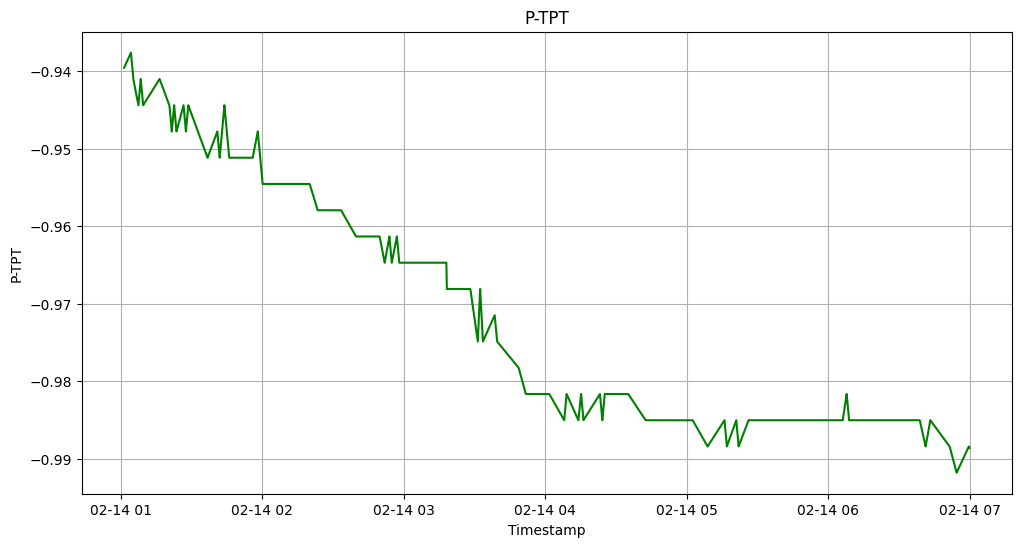

In [46]:
series = sig["P-TPT"]
fig = DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green"
)
fig.show()


#### Multiple Series Example

With `PlotMultipleSeries.plot_multiple_series` you can display several features on the same plot.  
This is helpful when you want to compare signals directly and observe how they evolve together.


C:\Users\Math\AppData\Local\Temp\ipykernel_15332\613254614.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


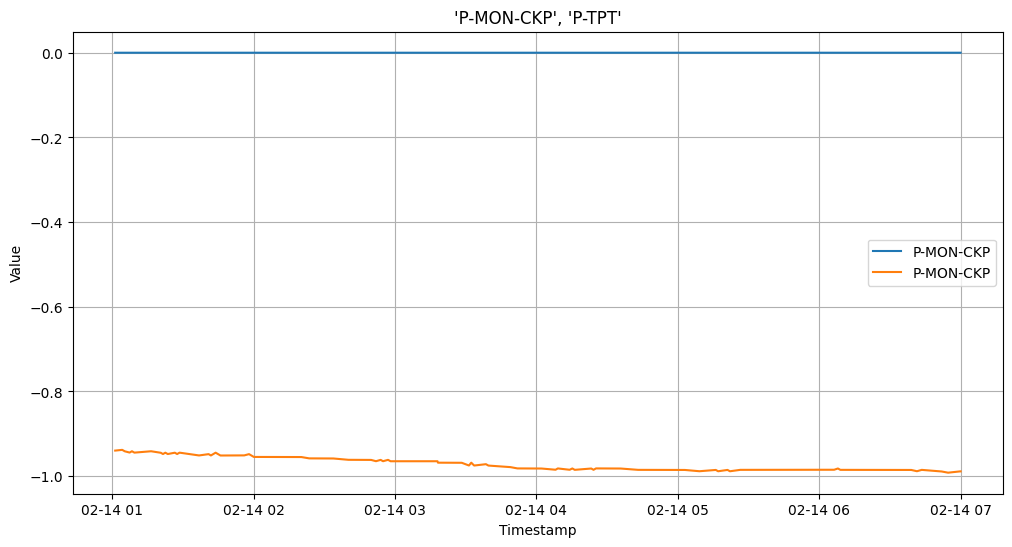

In [47]:
features = ['P-MON-CKP', 'P-TPT']
series_list = [sig[features]]

fig = PlotMultipleSeries.plot_multiple_series(
    series_list=series_list,
    labels=features,
    title="'P-MON-CKP', 'P-TPT'",
    xlabel="Timestamp",
    ylabel="Value"
)
fig.show()


#### Correlation Heatmap Example

Finally, `PlotCorrelationHeatmap.correlation_heatmap` creates a heatmap of pairwise correlations.  
This is a quick way to check which features are strongly related to each other.


C:\Users\Math\AppData\Local\Temp\ipykernel_15332\3210434829.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


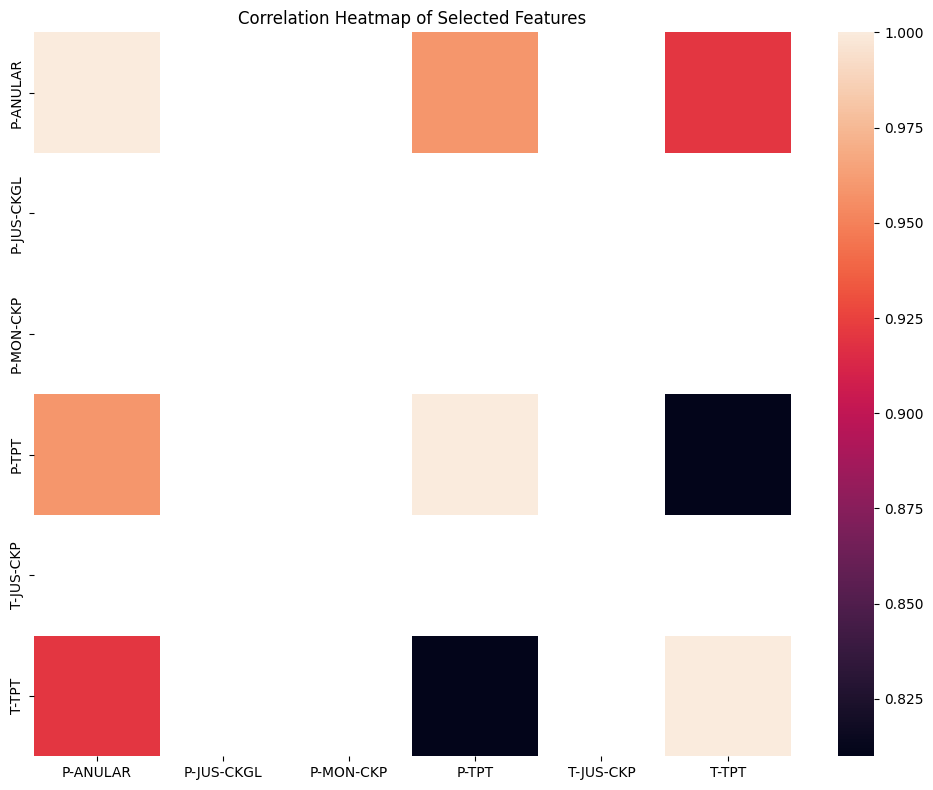

In [48]:
features = ['P-ANULAR', 'P-JUS-CKGL', 'P-MON-CKP', 'P-TPT', 'T-JUS-CKP', 'T-TPT']
subset = sig[features]

fig = PlotCorrelationHeatmap.correlation_heatmap(
    df_of_series=subset,
    title="Correlation Heatmap of Selected Features"
)
fig.show()


------

## 6.  🤖 Model Training & Evaluation

## Introduction to Model Training with 3WToolkit

In this section, we introduce the process of training models using 3WToolkit, with the 3W dataset. 

The goal is to demonstrate how to transform raw time series into datasets suitable for supervised trainining, leveraging the toolkit's automation and reproducibility features.

The pipeline includes the following main steps:
- Loading the 3W dataset.
- Segmenting the signals into windows, allowing each window to be treated as an independent sample for the model.
- Training the model, using the windows as inputs and the corresponding labels as target.

First we import the relevant modules and initialize a ParquetDataset instance, defining the target classes 0, 1 and 2. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from tqdm import tqdm
from pathlib import Path
from ThreeWToolkit.preprocessing import normalize, windowing
from ThreeWToolkit.trainer.trainer import ModelTrainer, TrainerConfig
from ThreeWToolkit.models.mlp import MLPConfig
from ThreeWToolkit.dataset import ParquetDataset
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig


In [ ]:
# Create a ParquetDataset that loads cleaned data with target classes 0, 1, and 2
dataset_path = Path("../../data/raw/")
ds_config = ParquetDatasetConfig(
    path=dataset_path, clean_data=True, download=False, target_class=[0, 1, 2]
)
ds = ParquetDataset(ds_config)
ds[19]

With the ParquetDataset instance defined, we can set the parameters used for the MLP model (in the MLPConfig object) that will be used alongside with the ModelTrainer and TrainerConfig. 

The defined worflow control most relevant parameters that will be used for training of a model. 

In [ ]:
# Initialize training and model configurations
window_size = 1000
mlp_config = MLPConfig(
    input_size=window_size,
    hidden_sizes=(32, 16),
    output_size=3,
    random_seed=11,
    activation_function="relu",
    regularization=None,
)

trainer_config = TrainerConfig(
    optimizer="adam",
    criterion="cross_entropy",
    batch_size=32,
    epochs=20,
    seed=11,
    config_model=mlp_config,
    learning_rate=0.001,
    device="cuda" if torch.cuda.is_available() else "cpu",
    cross_validation=False,
    shuffle_train=True,
)

trainer = ModelTrainer(trainer_config)
print(trainer.model)


The next step is to iterate over a dataset of time series events, applying a windowing function to a selected signal column, in this case "T-TPT".

 All windowed segments from all events are then concatenated into a single DataFrame (dfs_final). This prepares the data for supervised training, where each row represents a windowed segment with its corresponding class label.

In [ ]:
# Select target columns and prepare training data with windowing
selected_col = "T-TPT"
x_train = []
y_train = []
dfs = []

for event in tqdm(ds):
    windowed_signal = windowing(
        event["signal"][selected_col],
        window="hann",
        window_size=window_size,
        overlap=0.5,
        pad_last_window=True,
    )
    windowed_signal.drop(columns=["win"], inplace=True)
    windowed_signal["label"] = np.unique(event["label"]["class"])[0]
    dfs.append(windowed_signal)
dfs_final = pd.concat(dfs, ignore_index=True, axis=0)

Finally we can call the train function using the trainer object. 

In [ ]:
# Train the MLP model using the ModelTrainer interface
trainer.train(x_train=dfs_final.iloc[:, :-1], y_train=dfs_final["label"].astype(int))

After the model finished training, we can collect the metrics calling the test function of the trainer object, defining the metrics that will be used for evaluation. 

In [ ]:
# Evaluate model performance on validation set using ModelTrainer's test method
from ThreeWToolkit.metrics import accuracy_score, recall_score

test_loss, test_metrics = trainer.test(
    dfs_final.iloc[:, :-1],
    dfs_final["label"].astype(int),
    metrics=[
        accuracy_score,
        lambda y_true, y_pred: recall_score(y_true, y_pred, average="weighted"),
    ],
)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Metrics: {test_metrics}")

The trainer object also collects a history of validation and training loss that can be visualized after the training is completed. 

In [ ]:
# Visualize training history
plt.figure(figsize=(10, 5))
for i, fold_hist in enumerate(trainer.history):
    if fold_hist is not None:
        plt.plot(fold_hist["val_loss"], label="Val Loss")
        plt.plot(fold_hist["train_loss"], label="Train Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


TODO

-------

## 7. 📝 Generating Reports  

TODO

-----

**FIM**